## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# This proportion considers all users
(df.groupby(['user_id']).converted.sum() > 0).mean()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

*As per the dataframe info, all rows are non-null, and therefore have values.*

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [7]:
# The rows which do not match should be removed, to improve confidence in the accuracy of the data
df2 = df[(((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') == (df['landing_page'] == 'old_page')))]

In [8]:
# Double Check all of the correct rows were removed - this should be 0
print(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])
print(df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0])

0
0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [9]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
df2['user_id'].duplicated().sum()

1

In [11]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(index=[2893])
df2.reset_index();

In [14]:
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
(df2['converted'] == 1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.groupby('group')['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [17]:
(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Response**  
First, considering the results of part d, it is sufficient to say that the tests for the new page and old page have been equitably distributed to the experiment group. That is, there is an equal number of tests for the new page as there are for the old page.

Considering this, the probabilities obtained for conversion in part c should be directly indicitave of the test results - creating a ratio-based metric is unnecessary and if done, should produce simialr results.

Therefore, it appears as though there is evidence to assume that **the new treatment page does not lead to more conversions, as compared to the old page.** Confidence in this result is further supported considering the large number of data points provided.

However, these results do not explain how the data is distributed, and what statistical significance is attached to these findings. To consider these results as *sufficient* and *statistically significant*, hypothesis tests should be run.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Since there is a directional component associated with this statement, a less than or equal ,sign seems to be the most reasonable for the null hypothesis, and a greater than for the alternative.**

$$H_0: p_{new} - p_{old} \le 0$$


$$H_1: p_{new} - p_{old} > 0$$

*Where $H_0$ and $H_1$ are the null and alternative hypotheses, respectively.*

**The Type 1 Error Rate is: $\alpha = 0.05$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# Based on the assumption of equality, as stated above
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
group_count = df2.groupby('group').count()
group_count

,user_id,timestamp,landing_page,converted
group,,,,
control,145274,145274,145274,145274
treatment,145310,145310,145310,145310


In [21]:
n_new = group_count.iloc[1]['user_id']
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = group_count.iloc[0]['user_id']
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice(2, n_new, p=[1-p_new,p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice(2, n_old, p=[1-p_old,p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.00060086609377470179

*Note: The above result is approximately 0, and the difference may result from small errors due to randomness. Therefore, it is considered to match the results of the dataset, under the assumption of equality.*

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in np.arange(10000):
    new_page_converted = np.random.choice(2, n_new, p=[1-p_new,p_new])
    old_page_converted = np.random.choice(2, n_old, p=[1-p_old,p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

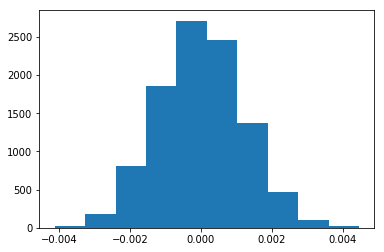

In [27]:
plt.hist(p_diffs);

The resulting distribution appears **normal**, as expected by the *Central Limit Theorem* and since the statistic being computed is the **difference in the means**.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Calculating proportions for the observed data
convert_old = df2.query("group == 'control'")['converted']
convert_new = df2.query("group == 'treatment'")['converted']

p_old_orig = convert_old.mean()
p_new_orig = convert_new.mean()

In [29]:
# Actual Propotion Differences
p_new_orig - p_old_orig

-0.0015782389853555567

In [30]:
p_val = (p_diffs > (p_new_orig - p_old_orig)).mean()
p_val

0.90190000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Hypothesis Test Conclusions**

The value computed in *part j* is known as the **p-value**. This is the probability of observing the statistic - the difference in means - or one more extreme in favor of the alternative, if the null hypothesis is true. In this case, the extreme relates to a greater than comparator, as per the definition of the alternative.

Thus, the decision of whether there is a difference in coversion between the new and old pages is dependent on the **p-value and the Type 1 Error Rate, $\alpha$**, which was previously established as **0.05**.

In this case, **we fail to reject the null hypothesis, since the p-value is greater than $\alpha$.** Therefore, under the decision of a 5% Type 1 Error Rate, the old page produces either equivalent, or more conversions than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'")['converted']
convert_new = df2.query("group == 'treatment'")['converted']
n_old = len(convert_old)
n_new = len(convert_new)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
stat, p_val = sm.stats.proportions_ztest([convert_new.sum(), convert_old.sum()], [n_new, n_old], alternative='larger')

In [34]:
stat, p_val

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Further Hypothesis Test Conclusions**

The built-in produces two values: `stat`: the Z-score and `p_val`: the p-value. The p-value has been previously defined, and its definition is applied in this context. The Z-score provided, however, is an additional metric representing the number of standard deviations a raw score is above or below the mean of what is being measured.

Interpretation of the Z-score is provided below:

In [35]:
from scipy.stats import norm

# Using a 95% confidence interval, i.e. a Type 1 Error Rate, alpha, of 0.05
print(stat < norm.ppf(1-0.05))

True


The above result indicates that the Z-score is less than the critical value, which concludes that we fail to reject the null hypothesis. Notice that the p-value obtained in the manually-computed result is similar to that computed with the built-in, and that the conclusions remain the same at a 95% confidence level, i.e. a Type 1 Error Rate of 0.05.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the response variable in question - conversion - is binary, Logistic regression is used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# Setting the intercept
df2['intercept'] = 1

# One Hot Encoding the groups
group_dummies = pd.get_dummies(df2['group'])

df2['ab_page'] = group_dummies['treatment'] 

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-18 02:57 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The null and alternative hypotheses here consider either converting, or not converting. That is, they are binary in nature and would be mathematically represented by equal to, or not equal to in the null and alternative hypotheses, respectively. Therefore, this would be similar to performing a two-sided test, as opposed to the one-sided 'greater than' test for the alternative done previously. As such, the p-value should differ from the value in Part II.**

**Specifically, the results indicate that $$p > \alpha$$
Where $$p = 0.1889$$ 
and $$\alpha = 0.05 $$
Therefore we fail to reject the null hypothesis, and at a 95% confidence level, i.e. a 0.05 Type 1 Error Rate, the old page produces either equivalent, or more conversions than the new page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Including other factors in the regression model may improve its overall accuracy, as the model may be able to capture more relationships between response and explanatory variables. However, this may also have the opposite effect if there are collinearities between explanatory variables, which may decrease the overall accuracy of the model. Furthermore, adding more factors could reduce the interpretability of the model and make it more difficult to gain human-understandable insights.**

**Understanding these advantages and drawbacks, there may be a trade-off to be made between model accuracy and interpretability. Aside from this, it is perhaps best to observe the effects of other explanatory variables on the response variable. In this case it may pertain to the user's `age`, `gender`, `ethnicity`, `location`, etc. as personal and situational factors which may contribute to them converting.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


*Note: Pandas' merge method will be used instead of join*

In [40]:
df2 = df2.merge(df3, on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [41]:
# One Hot Encoding the Countries
df2[['CA', 'UK']] = pd.get_dummies(df2['country']).drop(columns='US')

In [42]:
mod2 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
res2 = mod2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-18 02:58 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

**Results of Adding Country to the Model**

The above results indicate that as compared to the US, Canadian users have an approximately 1.04 times lower chance of converting. Conversely, UK users are approximately 1.01 more likely to convert than US users.

The effects of these results are underwhelming, however, especially considering their weights and statistical significance: both countries have p-values much larger than the Type 1 Error Rate of 0.05; the UK drastically so. Therefore, these results do not provide much insight into user conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
res3 = mod2.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-18 02:58 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

**Results of Adding Both Country and Page to the Model**

The above results are similar to the previous. For the same reasons, where the p-values are large, there is not statistical significance attached to either page or country, at a 95% confidence level (0.05 Type 1 Error Rate), on their effects on conversion. Furthermore, these explanatory variables do not seem to exhibit any collinearity whatsoever.

<a id='conclusions'></a>

## Conclusions

Results of all tests indicate that we fail to reject the null hypothesis, at a 0.05 Type 1 Error Rate. That is, there is sufficient statistical evidence to say that the conversions from the new page do not outweight the conversions from the old page. This provides both statistical and practical significance, since the process of implementing a new page across the board may be time-consuming.

As a result, it is recommended that the company keep their current page.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0